In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
diabetes = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Explore dataset
diabetes.info()
diabetes.describe()
diabetes.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
# Split data into features and target variable
y = diabetes['diabetes']
X = diabetes.drop(['diabetes'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [ ]:
# Train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
model.intercept_, model.coef_

(array([-8.13045782]),
 array([[ 1.01246406e-01,  3.60547984e-02, -2.09737931e-02,
         -2.57336457e-03, -2.04620718e-04,  8.24718338e-02,
          9.51045046e-01,  2.53467630e-02]]))

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

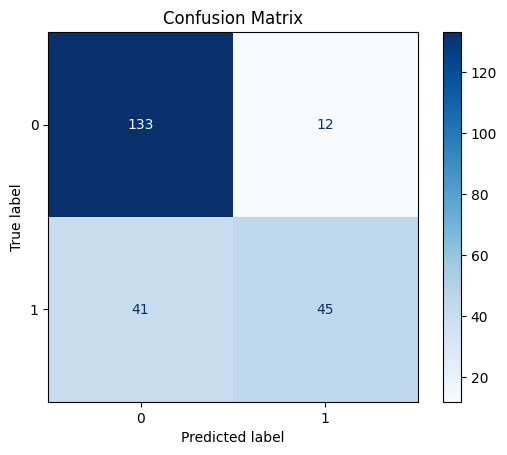

Accuracy Score: 0.7705627705627706
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       145
           1       0.79      0.52      0.63        86

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [ ]:
# Evaluate model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns

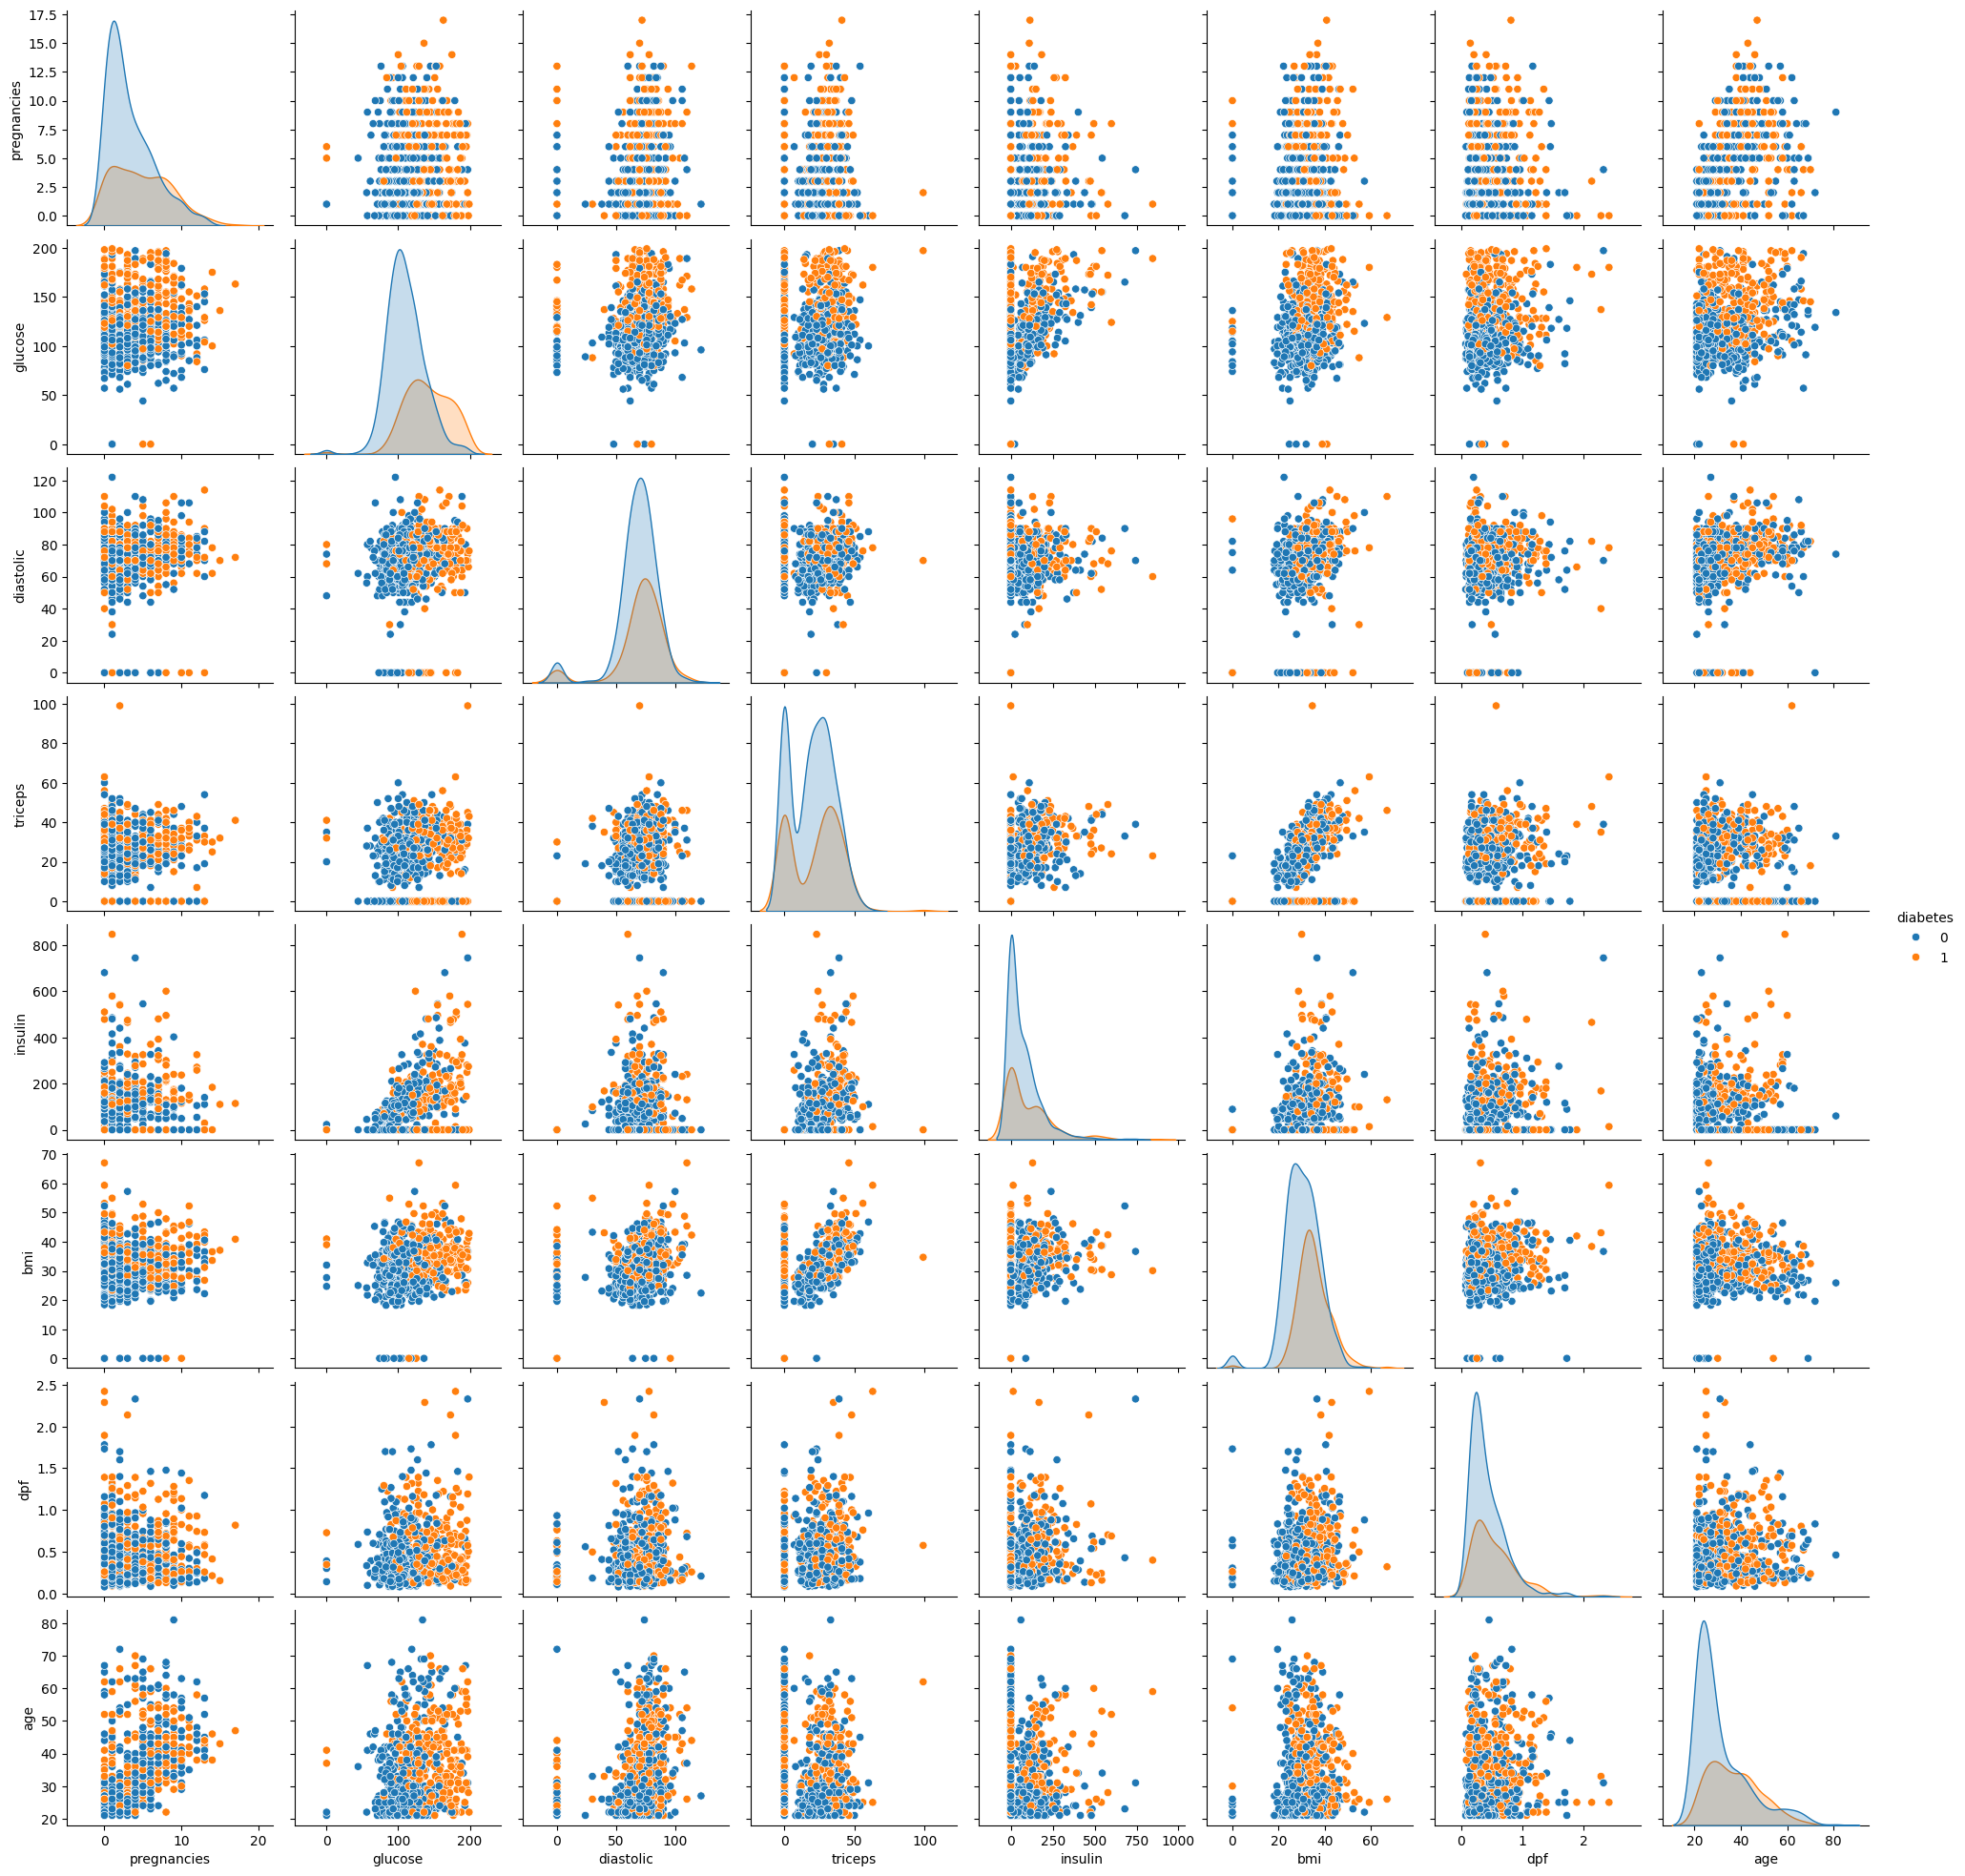

In [ ]:
# Pairplot of all numerical features
sns.pairplot(diabetes, hue="diabetes", diag_kind="kde")
plt.show()

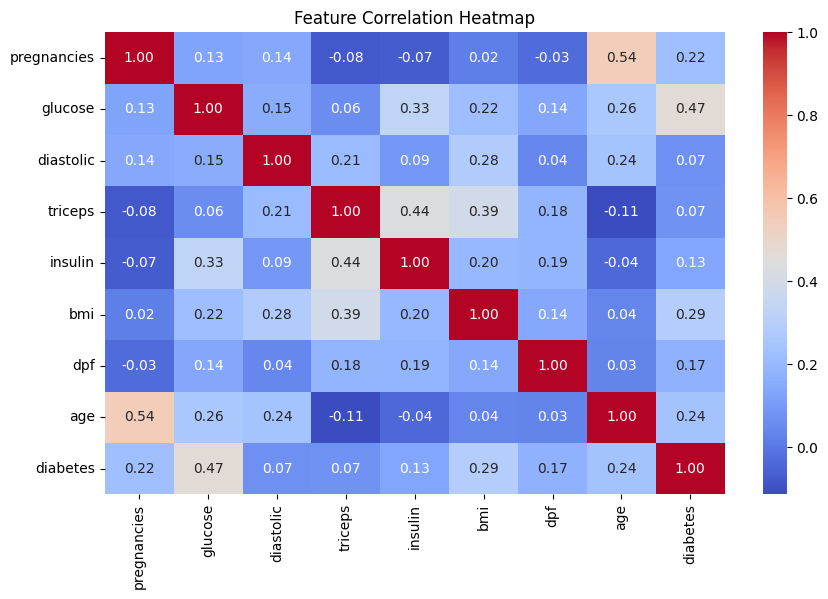

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

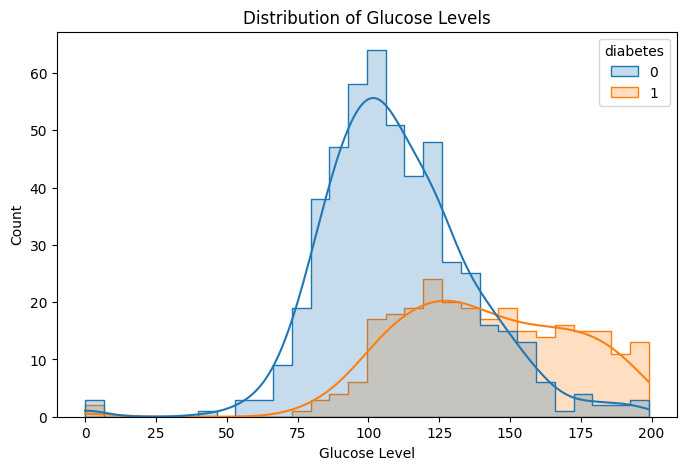

In [ ]:
# Distribution of glucose levels with hue
plt.figure(figsize=(8, 5))
sns.histplot(data=diabetes, x="glucose", bins=30, kde=True, hue="diabetes", element="step", common_norm=False)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()


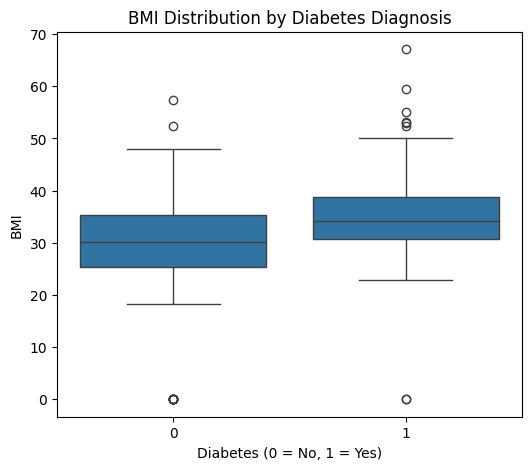

In [ ]:
# Boxplot of BMI vs Diabetes
plt.figure(figsize=(6, 5))
sns.boxplot(x=diabetes['diabetes'], y=diabetes['bmi'])
plt.title("BMI Distribution by Diabetes Diagnosis")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

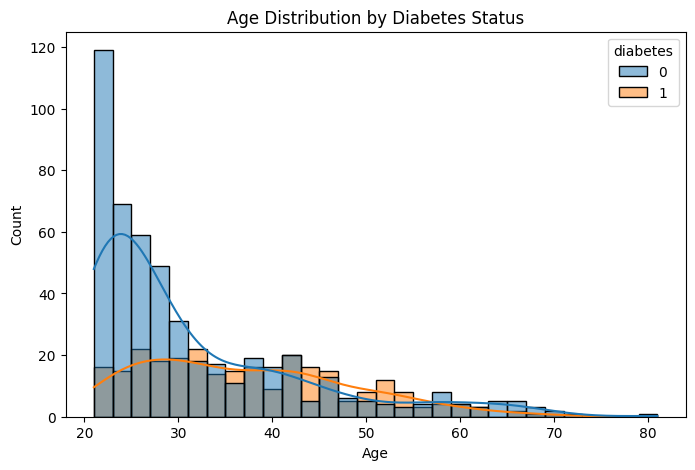

In [ ]:
# Age distribution by diabetes status
plt.figure(figsize=(8, 5))
sns.histplot(diabetes, x="age", hue="diabetes", kde=True, bins=30)
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()